<a href="https://colab.research.google.com/github/gunterno/PCDS/blob/main/P7A_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___Inspiré par le Kernel :___



# **NOTEBOOK D'APPRENTISSAGE**
<img src="https://zupimages.net/up/21/41/h6mx.gif" width="200" height="200"> 



---

Une société financière qui propose des crédits à la consommation pour des personnes ayant peu ou pas du tout d'historique de prêt.


L’entreprise souhaite **développer un modèle de scoring de la probabilité de défaut de paiement du client** pour étayer la décision d'accorder ou non un prêt à un client potentiel en s’appuyant sur des sources de données variées (données comportementales, données provenant d'autres institutions financières, etc.).

De plus, les chargés de relation client ont fait remonter le fait que les clients sont de plus en plus demandeurs de **transparence** vis-à-vis des décisions d’octroi de crédit. Cette demande de transparence des clients va tout à fait dans le sens des valeurs que l’entreprise veut incarner.

Elle décide donc de développer un **dashboard interactif** pour que les chargés de relation client puissent à la fois expliquer de façon la plus transparente possible les décisions d’octroi de crédit, mais également permettre à leurs clients de disposer de leurs informations personnelles et de les explorer facilement. 

### Mission

Présenter son travail de modélisation à l'oral


- Réaliser un dashboard pour présenter son travail de modélisation
-Rédiger une note méthodologique afin de communiquer sa démarche de modélisation
-Utiliser un logiciel de version de code pour assurer l’intégration du modèle
- Déployer un modèle via une API dans le Web

Michaël, manager, incite à sélectionner un kernel Kaggle pour faciliter la préparation des données nécessaires à l’élaboration du modèle de scoring. L'idée est d'analyser ce kernel pour l'adapter aux besoins de la mission.

### Spécifications du dashboard
Michaël fourni un cahier des charges pour le dashboard interactif. Celui-ci devra a minima contenir les fonctionnalités suivantes :

- Permettre de visualiser le score et l’interprétation de ce score pour chaque client de façon intelligible pour une personne non experte en data science.
- Permettre de visualiser des informations descriptives relatives à un client (via un système de filtre).
- Permettre de comparer les informations descriptives relatives à un client à l’ensemble des clients ou à un groupe de clients similaires.

---

In [ ]:
#Essential data science libraries
import pandas as pd
import seaborn as sns
import glob
import pickle
import os
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [ ]:
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000

In [ ]:
#Graphing…
plt.style.use('fivethirtyeight')
plt.rcParams.update(
    {
     'xtick.labelsize':25,
     'ytick.labelsize':25,
     'axes.labelsize': 25,
     'legend.fontsize': 25,
     'axes.titlesize':45,
     'axes.titleweight':'bold',
     'axes.titleweight':'bold'
    })

## Chargement des données et Analyse exploratoire

### Data description from [Kaggle](https://www.kaggle.com/c/home-credit-default-risk/data) : 


#### application_{train|test}.csv
This is the main table, broken into two files for Train (with TARGET) and Test (without TARGET).
Static data for all applications. One row represents one loan in our data sample.

#### bureau.csv
All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample).
For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.

#### bureau_balance.csv
Monthly balances of previous credits in Credit Bureau.
This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in sample * # of relative previous credits * # of months where we have some history observable for the previous credits) rows.

#### POS_CASH_balance.csv
Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit.
This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credits * # of months in which we have some history observable for the previous credits) rows.

#### credit_card_balance.csv
Monthly balance snapshots of previous credit cards that the applicant has with Home Credit.
This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credit cards * # of months where we have some history observable for the previous credit card) rows.

#### previous_application.csv
All previous applications for Home Credit loans of clients who have loans in our sample.
There is one row for each previous application related to loans in our data sample.

#### installments_payments.csv
Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample.
There is a) one row for every payment that was made plus b) one row each for missed payment.
One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit credit related to loans in our sample.

#### HomeCredit_columns_description.csv
This file contains descriptions for the columns in the various data files.

In [ ]:

## Fonctions
 
###Fonction valmanque, paramètre (dataframe, pourcent,1 ou 0)
###Imprime les colonnes avec le nombre de ligne avec valeurs ainsi que le pourcentage sans valeurs
###puis retourne une liste contenant les nom de colonnes ayant un pourcentage inférieur a la valeur transmise.
### retourne aussi le nombre de lignes non nulles correspondant à la colonne ValNa
 
def valmanque(df,perct,imp):
  # recherche des valeurs manquantes
  NutriColonne=df.columns.values
  ListeNaN=[]
  ValNaN=df.isna().sum()
  #nb Lignes
  LigneNonNull=[]
  NbLignes=len(df)
  if imp == 1:
    print("nombre de lignes :",NbLignes)
    print("nombre de ligne contenant des valeurs nul:")
    print(ValNaN)
    print()
    print("données par ligne après supression des valeurs null")
 
  i=0
  i2=0
  while i< len(df.columns):
    LigneNonNull.append(NbLignes-ValNaN[i])
 
    if imp == 1 and (ValNaN[i]*100/NbLignes)>=perct:
        print('-----------------------------------------')
        print(NutriColonne[i])
        print(NbLignes-ValNaN[i],' nombres de lignes remplies')
        print(ValNaN[i]*100/NbLignes,' % vide')
    
    if (ValNaN[i]*100/NbLignes)>=perct:
      ListeNaN.append(NutriColonne[i])
      i2=i2+1
    i=i+1
  print(i2,'sur',i,'variable avec plus de ',perct, 'pourcent de valeurs manquantes')
  return(ListeNaN)
 
#fonction donnant des données staistiques de bases en indiquant un dataframe et une liste de  noms de colonnes
#retourne graphiques de corrélations et un tableau de résultat
 
def Analyse_1(df,Var):  
  # Analyse statistique de base (describe fait pareil,mais je voulais ma version...)
  #création du dataframe
  Resume = pd.DataFrame(columns=['minimum','maximum','somme','moyenne','médiane','mode,','varianceVar','varianceStd'])
 
  for bcl in Var:
   
   mini=(df[bcl].min())
   
   maxi=(df[bcl].max())
 
   total=(df[bcl].sum())
  
   moy=(df[bcl].mean())
   
   mediane=(df[bcl].median())
  
   Modee=(df[bcl].mode())
   
   Varr=(df[bcl].var(ddof=0))
  
   Stdd=(df[bcl].std(ddof=0))
   
   #création du dataframe de résultat  'ajout row'
   df_new_row = pd.DataFrame(data=np.array([[mini,maxi,total,moy,mediane,Modee,Varr,Stdd]]), columns=['minimum','maximum','somme','moyenne','médiane','mode,','varianceVar','varianceStd'])
   Resume = pd.concat([Resume,df_new_row], ignore_index=True)
 
   plt.plot(df[bcl])
   plt.show()
  insert_index = 0
  insert_colname = 'Nom'
  insert_values = Var # this can be a numpy array too
  Resume.insert(loc=insert_index, column=insert_colname, value=insert_values)
  return(Resume)
 
# Fonction créant un graphique de corellation en indiquant du dataframe et le nom de l'indicateur
def correl(df,indicateur):
 
  corr=df.corr(method=indicateur)
  plt.figure(figsize = (16,5))
 
  sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=1)
  
def plot_stat(data, feature, title) : 
    
    ax, fig = plt.subplots(figsize=(20,8)) 
    ax = sns.countplot(y=feature, data=data, order=data[feature].value_counts(ascending=False).index)
    ax.set_title(title)

    for p in ax.patches:
                percentage = '{:.1f}%'.format(100 * p.get_width()/len(data[feature]))
                x = p.get_x() + p.get_width()
                y = p.get_y() + p.get_height()/2
                ax.annotate(percentage, (x, y), fontsize=20, fontweight='bold')

    show()

def plot_percent_target1(data, feature, title) : 
    
    cat_perc = data[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    ax, fig = plt.subplots(figsize=(20,8)) 
    ax = sns.barplot(y=feature, x='TARGET', data=cat_perc)
    ax.set_title(title)
    ax.set_xlabel("")
    ax.set_ylabel("Percent of target with value 1")

    for p in ax.patches:
                percentage = '{:.1f}%'.format(100 * p.get_width())
                x = p.get_x() + p.get_width()
                y = p.get_y() + p.get_height()/2
                ax.annotate(percentage, (x, y), fontsize=20, fontweight='bold')

    show()

In [ ]:
from google.colab import drive

drive.mount("/content/drive")



application_train = pd.read_csv("/content/drive/MyDrive/P7/data/application_train.csv")
application_test = pd.read_csv("/content/drive/MyDrive/P7/data/application_test.csv")
bureau = pd.read_csv("/content/drive/MyDrive/P7/data/bureau.csv")
#bureau_balance = pd.read_csv("/content/drive/MyDrive/P7/data/bureau_balance.csv")
#credit_card_balance = pd.read_csv("/content/drive/MyDrive/P7/data/credit_card_balance.csv")
installments_payments = pd.read_csv("/content/drive/MyDrive/P7/data/installments_payments.csv")
POS_CASH_balance = pd.read_csv("/content/drive/MyDrive/P7/data/POS_CASH_balance.csv")
previous_application = pd.read_csv("/content/drive/MyDrive/P7/data/previous_application.csv")
description = pd.read_csv("/content/drive/MyDrive/P7/data/HomeCredit_columns_description.csv",encoding="ISO-8859-1")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print("Explications des tables et colonnes :")
pd.set_option("max_colwidth", 400)

description

Explications des tables et colonnes :


,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,"Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)",NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,8,application_{train|test}.csv,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,9,application_{train|test}.csv,CNT_CHILDREN,Number of children the client has,NaN
7,10,application_{train|test}.csv,AMT_INCOME_TOTAL,Income of the client,NaN
8,11,application_{train|test}.csv,AMT_CREDIT,Credit amount of the loan,NaN
9,12,application_{train|test}.csv,AMT_ANNUITY,Loan annuity,NaN


### EDA application_train.csv | test.csv


In [ ]:
train=application_train.copy()
test=application_test.copy()




In [ ]:
print('taille de : train ', train.shape)
print('taille de : test ', test.shape)

taille de : train  (307511, 122)
taille de : test  (48744, 121)


la colonne manquante dans target et la colonne target

In [ ]:
#Distribution de la colonne'TARGET' entre les 1 crédit non remboursés et 0 crédit remboursés
application_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

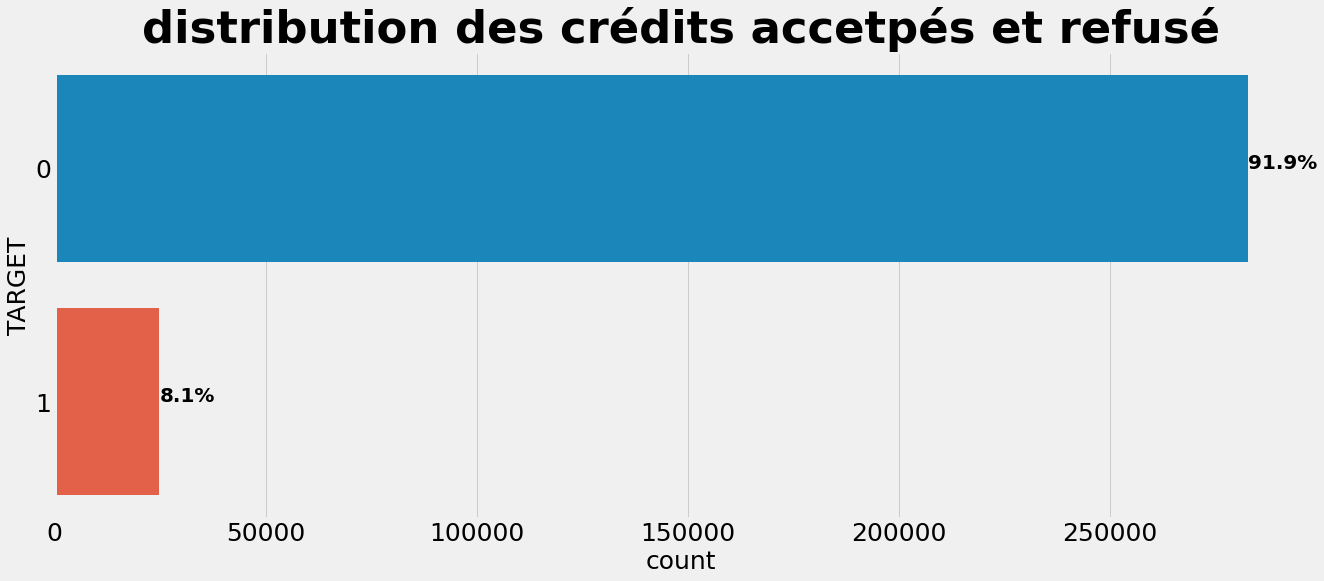

In [ ]:
ax, fig = plt.subplots(figsize=(20,8)) 
ax = sns.countplot(y='TARGET', data=train)
ax.set_title("distribution des crédits accetpés et refusé")

for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/len(application_train.TARGET))
        x = p.get_x() + p.get_width()
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y), fontsize=20, fontweight='bold')
        
show()

La pluspart des prêts sont remboursés à temps. Une fois que nous entrons dans des modèles d'apprentissage automatique plus sophistiqués, nous pouvons pondérer les classes par leur représentation dans les données pour refléter ce déséquilibre.

### Types de colonnes
Analyse rapide du type de features, mais surtout établir un aperçu afin de pouvoir poser une réflexion sur l'encodage des données catégorielles.

In [ ]:
#Number of each type of column
application_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64




#


In [ ]:

#Create a simple dataset with the train / test merge app
#supression de la collonne taget pour avoir une liste sans la réponse

liste_clients = train.append(test)


print('Train:' + str(train.shape))
print('Test:' + str(test.shape))
print('liste_clients:' + str(liste_clients.shape))


Train:(307511, 122)
Test:(48744, 121)
liste_clients:(356255, 122)


ANALISE

In [ ]:
liste_clients.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,356255.000000,307511.000000,356255.000000,3.562550e+05,3.562550e+05,356219.000000,3.559770e+05,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,121014.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,356253.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,162345.000000,3.555870e+05,286622.000000,176307.000000,148671.000000,183392.000000,119949.000000,107895.000000,167175.000000,177848.000000,179914.000000,115147.000000,145411.000000,113276.000000,178353.000000,109394.000000,160489.000000,176307.000000,148671.000000,183392.000000,119949.000000,107895.000000,167175.000000,177848.000000,179914.000000,115147.000000,145411.000000,113276.000000,178353.000000,109394.000000,160489.000000,176307.000000,148671.000000,183392.000000,119949.000000,107895.000000,167175.000000,177848.000000,179914.000000,115147.000000,145411.000000,113276.000000,178353.000000,109394.000000,160489.000000,185200.000000,355205.000000,355205.000000,355205.000000,355205.000000,356254.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.00000,356255.000000,356255.000000,356255.000000,356255.000000,308687.000000,308687.000000,308687.000000,308687.000000,308687.000000,308687.000000
mean,278128.000000,0.080729,0.414316,1.701161e+05,5.877674e+05,27425.560657,5.280200e+05,0.020917,-16041.248841,64317.231413,-4983.593527,-3002.071163,12.023741,0.999994,0.818498,0.200098,0.998170,0.278612,0.071213,2.151858,2.050506,2.028932,12.055749,0.015649,0.051371,0.040847,0.078076,0.229661,0.178824,0.501965,5.148900e-01,0.509350,0.118138,0.088673,0.977889,0.752283,0.045045,0.079819,0.150015,0.227331,0.232817,0.066454,0.101495,0.108089,0.008868,0.028503,0.114914,0.087750,0.977239,0.759452,0.042930,0.075346,0.145471,0.223315,0.228878,0.065092,0.106382,0.106641,0.008116,0.027183,0.118549

#57 sur 121 variable avec plus de  10 pourcent de valeurs manquantes


In [ ]:
#donction perso pour valeur manquantes
valmanque(liste_clients,10,0)

58 sur 122 variable avec plus de  10 pourcent de valeurs manquantes


['TARGET',
 'OWN_CAR_AGE',
 'OCCUPATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAP

In [ ]:
#donction perso pour valeur manquantes
valmanque(liste_clients,50,0)

37 sur 122 variable avec plus de  50 pourcent de valeurs manquantes


['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'WALLSMATERIAL_MODE']

"37 sur 121 variable avec plus de  50 pourcent de valeurs manquantes


# Features engineering
Nous pourrions enrichir et retravailler, ou créer de nouvelles variables, mais ceci n'étant pas le centre du projet je me contenterai de suprimmer quelques colonnes que je trouve mal adaptées ou inapropriées.

De plus nous alons travailler sur train/test, tranin contient déjà la décision de la banque.
Ajouter de nouveles variables modifierait la réalité de l'accord ou non du prêt.


La plupart des variables catégorielles ont un nombre relativement petit d'entrées uniques. Nous devrons trouver un moyen de traiter ces variables catégorielles…

[texte du lien](https://)### Valeurs manquantes
En modélisation, des modèles tels que XGBoost peuvent gérer les valeurs manquantes sans imputation. Plusieurs alternatives seront possibles: remplacer les NaN, supprimer les colonnes avec un pourcentage élevé de valeurs manquantes (impossible de savoir à l'avance si ces colonnes seront utiles à notre modèle). Dans l'immédiat toutes les colonnes sont conservées…

LightGBM utilise NA (NaN) pour représenter les valeurs manquantes par défaut. 
Nous allons garder cette option.

Une synthèse des données manquantes un peu confuse du fait du grand nombre de variables, mais il se dégage un premier constat qui montre que les NaN sont plus fortement présentent sur les caractéristiques des habitats (et non sur les crédits), comme l'atteste le TOP 10 ci-après…

In [ ]:
def nan_check(data):
    '''Check Missing Values'''
    total = data.isnull().sum()
    percent_1 = data.isnull().sum()/data.isnull().count()*100
    percent_2 = (np.round(percent_1, 2))
    missing_data = pd.concat([total, percent_2], 
                             axis=1, keys=['Total', '%']).sort_values('%', ascending=False)
    return missing_data

print('TOP 20 Missing values from Training dataset')
nan_check(liste_clients)[:20]

TOP 20 Missing values from Training dataset


,Total,%
COMMONAREA_AVG,248360,69.71
COMMONAREA_MODE,248360,69.71
COMMONAREA_MEDI,248360,69.71
NONLIVINGAPARTMENTS_AVG,246861,69.29
NONLIVINGAPARTMENTS_MODE,246861,69.29
NONLIVINGAPARTMENTS_MEDI,246861,69.29
FONDKAPREMONT_MODE,243092,68.24
LIVINGAPARTMENTS_MEDI,242979,68.20
LIVINGAPARTMENTS_AVG,242979,68.20
LIVINGAPARTMENTS_MODE,242979,68.20


#Outliers

In [ ]:
#How many days before the application the perso... (def. from HomeCredit_columns_description.csv)
liste_clients['DAYS_EMPLOYED'].describe()

count    356255.000000
mean      64317.231413
std      141705.532576
min      -17912.000000
25%       -2781.000000
50%       -1224.000000
75%        -290.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [ ]:
print("%0.0f valeur 1000 ans 'days employed' " % 
      len(liste_clients[liste_clients['DAYS_EMPLOYED'] == 365243]))


64648 valeur 1000 ans 'days employed' 


365243 est la valeur maximale pour DAYS_EMPLOYED elle représente 1000 ans, il est curieux de retrouver ce chifres de très nombreuse fois
celà ressemble à une valeur impossible placée là pour le programme de la banque.

#Les seuls outliers semblent voulu

### analyse 


**Loan types -** Distribution du type de prêts contractés + comparatif avec le pourcentage des prêts avec la valeur TARGET 1(prêt non retourné).

Les prêts renouvelables ne représentent qu'une petite fraction (10%) du nombre total de prêts; dans le même temps, un plus grand nombre de crédits renouvelables, par rapport à leur fréquence, ne sont pas remboursés.

**Client gender -** Bien que deux fois plus de prêt rembourser vienne de femmes cel me semble un facteur trop discriminant pour l'éthique de la banque colonne supprimée

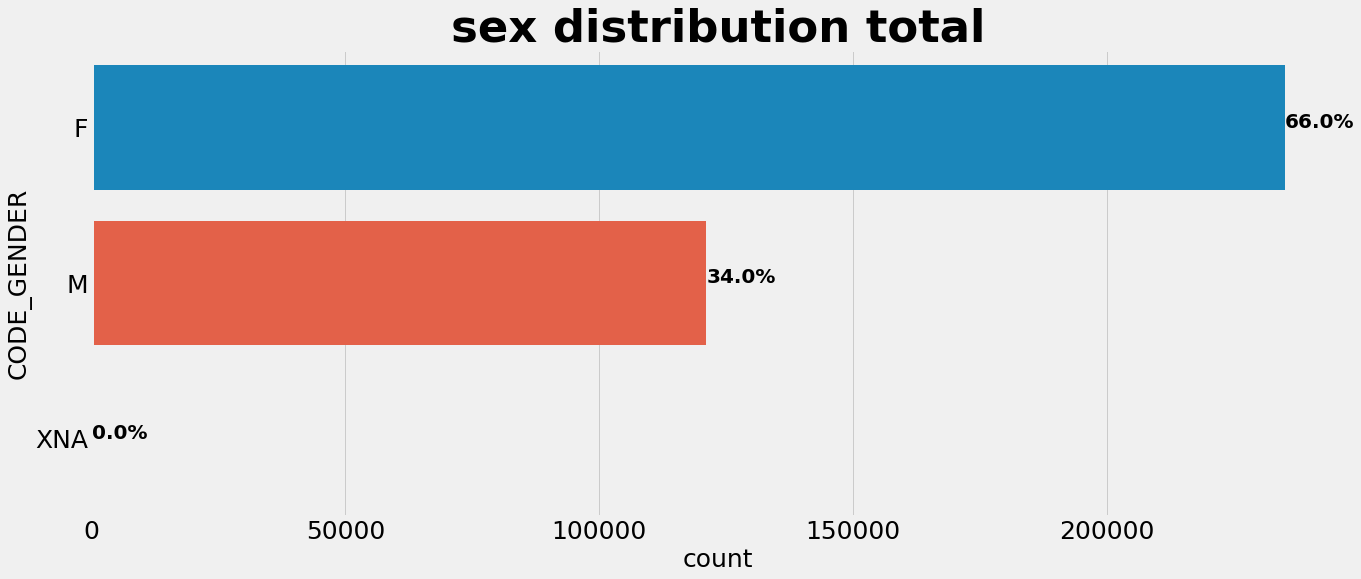

                                   -------------------------------------------------------


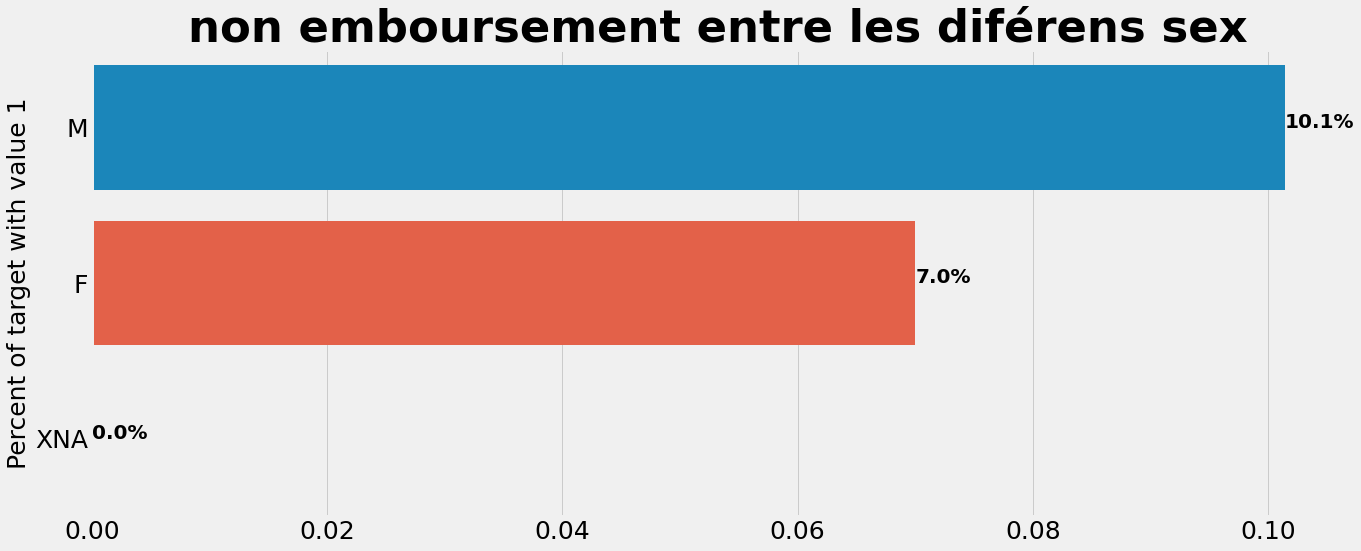

In [ ]:
#
plot_stat(liste_clients, 'CODE_GENDER',"sex distribution total")
print("                                   -------------------------------------------------------")
plot_percent_target1(liste_clients, 'CODE_GENDER',"non emboursement entre les diférens sex")

Le nombre de clients féminins est presque le double du nombre de clients masculins. En ce qui concerne le pourcentage de crédits en souffrance, les hommes ont plus de chances de ne pas rembourser leurs prêts (10%), comparativement aux femmes (7%).

XNA dot être prévue pour quelque chose qui n'a pas été utilisé

In [ ]:
del(liste_clients['CODE_GENDER'])


La pocession d'un véhicule ou non me semble non adéquate
regardons

**Flag own car -** Distribution d'un impact possible entre les clients propriétaire d'un véhicule et ceux qui ne le sont pas…

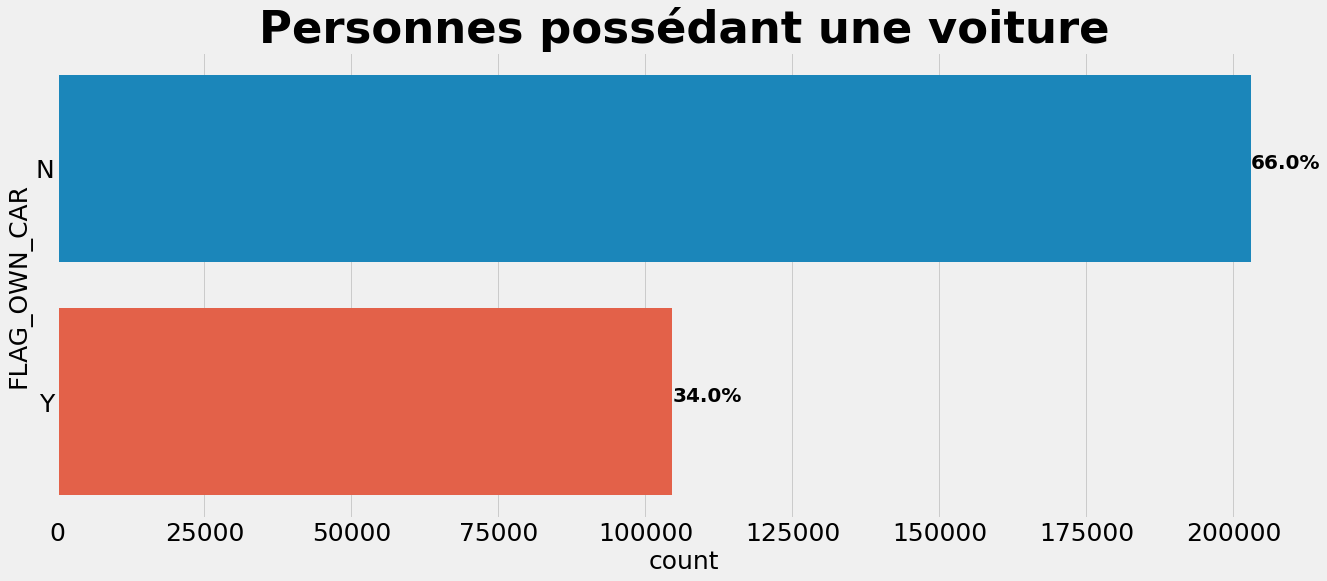

                                   -------------------------------------------------------


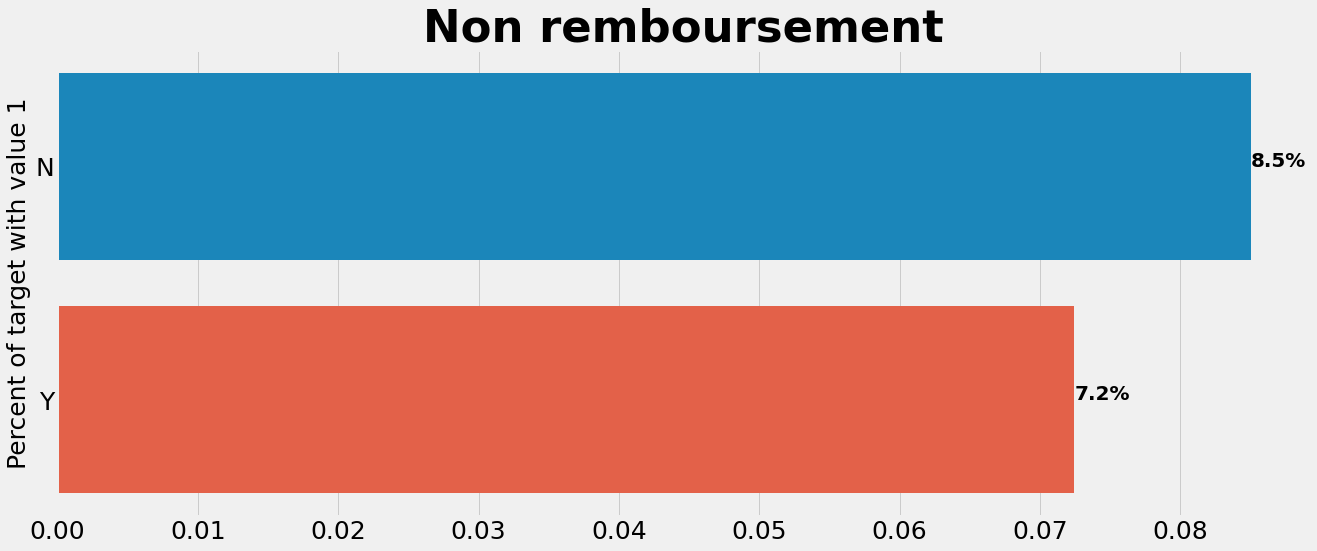

In [ ]:
#FLAG_OWN_CAR
plot_stat(application_train, 'FLAG_OWN_CAR',"Personnes possédant une voiture")
print("                                   -------------------------------------------------------")
plot_percent_target1(application_train, 'FLAG_OWN_CAR',"Non remboursement")

#Comme j'y avais pensé celà n'est pas représentatif.

In [ ]:
del(liste_clients['FLAG_OWN_CAR'])

Les deux jeux de données ont exactement le même format avec une seule différence, la TARGET dispo dans le train.

# le dataframe liste_clients est utilisé comme dataframe complet

Mais nous utiliserons train pour l'entrainement et test pour le test puisque nous n'avons pas les données complêtes (test) ne contient pas le résultat.

## Preprocessing des données

### Split train / test data
Il est nécessaire de commencer par la mise en place des données d'entrainement / test. On peut procéder en rappel avec les jeux de données application_train/test.

PCA

In [ ]:
liste_clients

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1.0,Cash loans,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0.0,Cash loans,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0.0,Revolving loans,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [ ]:
df1 = liste_clients.copy()



In [ ]:
#instanciation
#classe pour l'ACP
from sklearn.decomposition import PCA
pca_1 = PCA(svd_solver='full')

In [ ]:
#affichage des paramètres
print(pca_1)

PCA(svd_solver='full')


### Encoding categorical features 


In [ ]:
from sklearn.preprocessing import LabelEncoder

ENCODAGE DES LABELS STRING

In [ ]:
liste=liste_clients.columns
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for  bcl in liste:
    liste_clients[bcl] = le.fit_transform(liste_clients[bcl].astype(str))


#nous aurions pu procéder par colonne définie mais cette méthode nous permet d'utiliser un futur dataset qui aurait de nouvelles colonne labelk

In [ ]:

X=train.copy()
del(X['TARGET'])

from sklearn.preprocessing import StandardScaler
values = liste_clients
values_cr = StandardScaler().fit_transform(values)
pca_1=PCA(20) 
pca_1 = pca_1.fit_transform(liste_clients)

# On entraîne notre modèle et on l'évalue avec une 
# méthode de validation croisée 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=5)
mean_pca = cross_val_score(clf, pca_1, target, cv=50).mean()
mean_all = cross_val_score(clf, values, target, cv=50).mean()

pd.DataFrame({"Précision moyenne après ACP" : [mean_pca], 
              "Précision moyenne sans ACP" : [mean_all], 
              "Nombre de composantes" : [pca_1.shape[1]]})

KeyboardInterrupt: ignored

In [ ]:
pca_1.shape

AttributeError: ignored

In [ ]:
mean_pca

NameError: ignored

In [ ]:
liste_clients.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE              int64
FLAG_OWN_REALTY                 int64
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL                int64
AMT_CREDIT                      int64
AMT_ANNUITY                     int64
AMT_GOODS_PRICE                 int64
NAME_TYPE_SUITE                 int64
NAME_INCOME_TYPE                int64
NAME_EDUCATION_TYPE             int64
NAME_FAMILY_STATUS              int64
NAME_HOUSING_TYPE               int64
REGION_POPULATION_RELATIVE      int64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION               int64
DAYS_ID_PUBLISH                 int64
OWN_CAR_AGE                     int64
FLAG_MOBIL                      int64
FLAG_EMP_PHONE                  int64
FLAG_WORK_PHONE                 int64
FLAG_CONT_MOBILE                int64
FLAG_PHONE                      int64
FLAG_EMAIL                      int64
OCCUPATION_T

In [ ]:
liste_clients

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,1,0,1,0,1128,3732,3544,651,6,7,4,3,1,64,16928,9000,8841,1247,63,1,1,0,1,1,0,8,0,1,2,6,2,0,0,0,0,0,0,5,1614,31503,287,149,369,237,92,143,0,49,39,40,369,101,190,0,0,24,383,167,97,144,0,2,2,3,377,24,198,0,0,47,369,193,94,144,0,4,4,6,375,47,193,0,0,3,0,149,5,0,12,2,12,2,151,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,0,0,0,0,1466,1142,6038,55,1,4,1,1,1,12,6763,1687,2069,2123,63,1,1,0,1,1,0,3,8,0,1,1,3,0,0,0,0,0,0,39,31363,91220,814,682,529,263,118,605,76,7,198,153,130,491,549,35,98,88,538,193,123,497,2,1,7,8,128,86,554,0,0,185,529,219,120,608,4,2,14,16,132,183,558,2,100,3,0,714,0,0,1,0,1,0,3655,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,0,1,1,0,2245,1332,12101,161,6,7,4,3,1,48,9044,4423,9522,1703,19,1,1,1,1,1,0,8,0,1,2,1,23,0,0,0,0,0,0,11,134315,78852,677,2391,3831,294,149,3271,266,294,414,318,3580,1917,5272,410,3397,770,3891,224,154,3215,26,30,25,25,3621,749,5382,178,3432,1163,3821,250,151,3289,46,46,49,47,3618,1119,5360,231,3419,0,1,5191,7,2,0,0,0,0,3641,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5,0,0,1,0,485,3299,4667,581,6,7,4,0,1,35,9003,5300,15713,1598,63,1,1,0,1,0,0,8,8,1,2,6,9,0,0,0,0,0,0,5,134315,96738,814,2391,3831,294,149,3271,266,294,414,318,3580,1917,5272,410,3397,770,3891,224,154,3215,26,30,25,25,3621,749,5382,178,3432,1163,3821,250,151,3289,46,46,49,47,3618,1119,5360,231,3419,0,1,5191,7,2,12,0,12,0,3421,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,9,9,24,11,25
4,6,0,0,1,0,314,4261,2904,881,6,7,4,3,1,75,9930,5299,9579,2732,63,1,1,0,1,0,0,3,0,1,2,4,3,0,0,0,0,1,1,37,134315,40210,814,2391,3831,294,149,3271,266,294,414,318,3580,1917,5272,410,3397,770,3891,224,154,3215,26,30,25,25,3621,749,5382,178,3432,1163,3821,250,151,3289,46,46,49,47,3618,1119,5360,231,3419,0,1,5191,7,2,0,0,0,0,120,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Use Scikit-learn to transform with maximum absolute scaling
scaler = MinMaxScaler()
scaler.fit(liste_clients)
scaled = scaler.transform(liste_clients)
scaled_df = pd.DataFrame(scaled, columns=liste_clients.columns)
print(scaled_df)

        SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  FLAG_OWN_REALTY  CNT_CHILDREN  \
0         0.000003     0.5                 0.0              1.0      0.000000   
1         0.000006     0.0                 0.0              0.0      0.000000   
2         0.000008     0.0                 1.0              1.0      0.000000   
3         0.000014     0.0                 0.0              1.0      0.000000   
4         0.000017     0.0                 0.0              1.0      0.000000   
...            ...     ...                 ...              ...           ...   
356250    0.999905     1.0                 0.0              1.0      0.000000   
356251    0.999907     1.0                 0.0              0.0      0.466667   
356252    0.999910     1.0                 0.0              1.0      0.066667   
356253    0.999913     1.0                 0.0              0.0      0.000000   
356254    0.999986     1.0                 0.0              0.0      0.000000   

        AMT_INCOME_TOTAL  A

In [ ]:
train


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:

train.to_csv("/content/drive/MyDrive/P7/data/clientsdata.csv")
